# Marine Risk Prediction case study

## Brief

The objective of this case study is to build a risk score model. 

A risk-based model provides a risk score at a vessel level to assist in risk selection stage of the underwriting.

Your target variable should be a binary variable where 1 is ‘Ships suffered an accident’.

For the case study, carry out the analysis, design and validate your model based on the datasets using python.

## Data Assessment

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# Load data
ship_data = pd.read_csv('C:/Users/324910/Documents/Projects/Ships/Ships Data.csv',
                       error_bad_lines=False)

status_history = pd.read_csv('C:/Users/324910/Documents/Projects/Ships/Status History.csv',
                       error_bad_lines=False)

In [9]:
# View the variables in ship_data
ship_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50863 entries, 0 to 50862
Data columns (total 13 columns):
Unique Identifier          50863 non-null object
GROSSTONNAGE               50863 non-null int64
LENGTH                     50863 non-null int64
BREADTH                    50862 non-null float64
COUNTRYOFBUILD             50863 non-null object
BUILTDATE                  50863 non-null int64
COUNTRY OF REGISTRATION    50863 non-null object
CLASS                      37999 non-null object
DEADWEIGHT                 50863 non-null int64
SHIP TYPE                  50863 non-null object
ICE_STRENGTHENED           36354 non-null object
ICE_BREAKING               36354 non-null object
ACCIDENT DATE              4478 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 5.0+ MB


In [10]:
# View the variables in status_history
status_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213841 entries, 0 to 213840
Data columns (total 3 columns):
Unique Identifier    213841 non-null object
STATUS               213841 non-null object
STATUSDATE           213841 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [11]:
# Missing values
ship_data.loc[:, ship_data.isnull().sum() > 0].isnull().sum().sort_values(ascending=False) ## variables with missing values

ACCIDENT DATE       46385
ICE_BREAKING        14509
ICE_STRENGTHENED    14509
CLASS               12864
BREADTH                 1
dtype: int64

In [13]:
# Missing values
status_history.loc[:, status_history.isnull().sum() > 0].isnull().sum().sort_values(ascending=False) ## variables with missing values

Series([], dtype: float64)

In [15]:
# Summary statistics for numerical variables
display(ship_data.describe(include=[np.number])) ## df of summary stats for each variable

,GROSSTONNAGE,LENGTH,BREADTH,BUILTDATE,DEADWEIGHT
count,50863.000000,50863.000000,50862.000000,50863.000000,50863.000000
mean,21829.453041,136.836325,22.185364,2001.137782,33367.597920
std,33882.614158,82.995244,12.599410,14.079682,56405.288261
min,0.000000,0.000000,0.000000,1951.000000,0.000000
25%,878.500000,68.000000,12.000000,1993.000000,1215.000000
50%,5368.000000,117.000000,18.000000,2006.000000,6840.000000
75%,30174.000000,190.000000,32.000000,2012.000000,47499.000000
max,234006.000000,400.000000,70.000000,2019.000000,441585.000000


In [17]:
# Distributions for unique identifier
status_history['Unique Identifier'].value_counts()

RXZ811775853     24
RXZ1089692154    22
RXZ897774746     20
RXZ1150284490    20
RXZ959788440     19
RXZ1319852994    19
RXZ741004896     18
RXZ732841604     18
RXZ737594314     18
RXZ966282974     18
RXZ578924528     18
RXZ1218885150    18
RXZ1096954092    18
RXZ809309361     18
RXZ998742080     17
RXZ1128110692    17
RXZ1066654980    17
RXZ449052120     17
RXZ732273464     16
RXZ677176764     16
RXZ591101496     16
RXZ563312952     16
RXZ537777647     16
RXZ684351202     16
RXZ1032838395    16
RXZ624146469     16
RXZ990850797     16
RXZ470415225     16
RXZ1283663953    16
RXZ663787572     15
                 ..
RXZ1254102696     2
RXZ1026396539     2
RXZ1263726380     2
RXZ1200468748     2
RXZ541757580      2
RXZ983968150      2
RXZ956822674      2
RXZ391075560      2
RXZ563108998      2
RXZ881551432      2
RXZ691380735      2
RXZ1052705043     2
RXZ1087904204     2
RXZ1149753344     2
RXZ1039254723     2
RXZ1084974448     2
RXZ629770680      2
RXZ1260553875     2
RXZ715221889      2


In [18]:
# Distribution for STATUS
status_history['STATUS'].value_counts()

19970000    754
19960000    736
20100101    677
19950000    652
19930000    618
20070101    566
20060101    559
20040101    520
20050101    509
19940000    490
19920000    482
20080000    455
20080101    438
19910000    430
20110101    422
19980000    417
20060000    394
20130101    354
20120101    354
20151201    352
20040000    339
20140101    335
19900000    333
20020000    327
20151101    304
19890000    289
20070000    288
20090000    276
20100601    268
19790000    262
           ... 
19961229      1
19750324      1
19850814      1
19871108      1
19611128      1
19691025      1
19750217      1
19780824      1
19860611      1
19660512      1
19520601      1
19621107      1
19820207      1
19580730      1
19650712      1
19560912      1
19610104      1
19720706      1
19820717      1
19810902      1
19560620      1
19591229      1
19900310      1
19600125      1
19970824      1
19671014      1
19800923      1
19700620      1
19640215      1
19730206      1
Name: STATUSDATE, Length

In [19]:
# Distribution for STATUSDATE
status_history['STATUSDATE'].value_counts()

19970000    754
19960000    736
20100101    677
19950000    652
19930000    618
20070101    566
20060101    559
20040101    520
20050101    509
19940000    490
19920000    482
20080000    455
20080101    438
19910000    430
20110101    422
19980000    417
20060000    394
20130101    354
20120101    354
20151201    352
20040000    339
20140101    335
19900000    333
20020000    327
20151101    304
19890000    289
20070000    288
20090000    276
20100601    268
19790000    262
           ... 
19961229      1
19750324      1
19850814      1
19871108      1
19611128      1
19691025      1
19750217      1
19780824      1
19860611      1
19660512      1
19520601      1
19621107      1
19820207      1
19580730      1
19650712      1
19560912      1
19610104      1
19720706      1
19820717      1
19810902      1
19560620      1
19591229      1
19900310      1
19600125      1
19970824      1
19671014      1
19800923      1
19700620      1
19640215      1
19730206      1
Name: STATUSDATE, Length

In [20]:
# Distribution for country of registration
ship_data['COUNTRY OF REGISTRATION'].value_counts()

Panama                         5507
Indonesia                      3472
Unknown                        3182
Liberia                        3121
China People's Republic Of     3012
Japan                          2960
Marshall Islands               2888
Hong Kong China                2167
Singapore                      1924
Malta                          1641
Philippines                    1535
Russia                         1266
Korea South                    1067
Vietnam                         983
Bahamas                         836
Greece                          790
Cyprus                          696
Turkey                          656
Netherlands                     566
India                           535
Iran                            526
Italy                           512
Antigua & Barbuda               507
Thailand                        462
Portugal (Mar)                  421
Malaysia                        415
Norway                          382
Norway (Nis)                

In [21]:
# Distribution for country of build
ship_data['COUNTRYOFBUILD'].value_counts()

Japan                          16118
China People's Republic Of     11405
Korea South                     6525
Indonesia                       1444
Vietnam                         1189
Turkey                          1094
Netherlands                      954
Norway                           759
Germany                          756
Germany Federal Republic Of      750
Philippines                      699
U.S.S.R.                         636
United States Of America         495
Romania                          475
Malaysia                         432
Denmark                          421
Italy                            415
Singapore                        415
Poland                           406
Australia                        393
India                            384
Spain                            371
Russia                           347
Croatia                          326
Greece                           321
Chinese Taipei                   311
United Kingdom                   307
B

In [23]:
# Distribution for class
ship_data['CLASS'].value_counts()

Nippon Kaiji Kyokai                               6648
DNV-GL (VL)                                       5301
Lloyd's Register                                  3838
Bureau Veritas                                    3747
American Bureau of Shipping                       3362
China Classification Society                      2926
Biro Klasifikasi Indonesia                        2320
Registro Italiano Navale                          1696
Korean Register of Shipping                       1640
Russian Maritime Register                         1099
Vietnam Register                                   777
Flag authority                                     588
Indian Register of Shipping                        410
Zianlian Chuen                                     333
Asia Classification Society                        221
Turk Loydu                                         211
Croatian Register of Shipping                      188
International Register                             185
Polski Rej

In [24]:
# Distribution for ship type
ship_data['SHIP TYPE'].value_counts()

Dry Cargo/Passenger    26140
Tankers                14279
Bulk Carriers          10444
Name: SHIP TYPE, dtype: int64

In [26]:
# Distribution for accident date
ship_data['ACCIDENT DATE'].value_counts()

2011-03-11T00:00:00.000Z    13
2013-11-08T00:00:00.000Z    11
2019-04-22T00:00:00.000Z     8
2014-07-15T00:00:00.000Z     8
2018-12-28T00:00:00.000Z     7
2019-09-09T00:00:00.000Z     6
2018-03-01T00:00:00.000Z     6
2016-11-20T00:00:00.000Z     6
2018-06-26T00:00:00.000Z     6
2018-07-15T00:00:00.000Z     6
2014-08-05T00:00:00.000Z     6
2015-12-08T00:00:00.000Z     6
2019-03-09T00:00:00.000Z     6
2009-02-20T00:00:00.000Z     6
2017-04-22T00:00:00.000Z     6
2015-10-05T00:00:00.000Z     6
2014-11-22T00:00:00.000Z     5
2016-12-04T00:00:00.000Z     5
2019-08-25T00:00:00.000Z     5
2019-03-25T00:00:00.000Z     5
2010-07-24T00:00:00.000Z     5
2016-01-19T00:00:00.000Z     5
2014-05-15T00:00:00.000Z     5
2014-07-14T00:00:00.000Z     5
2018-08-06T00:00:00.000Z     5
2016-07-15T00:00:00.000Z     5
2016-05-11T00:00:00.000Z     5
2010-06-20T00:00:00.000Z     5
2013-01-08T00:00:00.000Z     5
2012-01-20T00:00:00.000Z     5
                            ..
2011-12-19T00:00:00.000Z     1
2009-05-

In [29]:
# Creation of status category variable

status_conditions = [
 (       (status_history['STATUS'] == "IN SERVICE/COMMISSION") |
         (status_history['STATUS'] == "U.S. RESERVE FLEET") |  
         (status_history['STATUS'] == "CONVERTING/REBUILDING") |    
         (status_history['STATUS'] == "LAID-UP") |   
         (status_history['STATUS'] == "TO BE BROKEN UP") |
         (status_history['STATUS'] == "IN CASUALTY OR REPAIRING")
         ),
 (       (status_history['STATUS'] == "PROJECTED") |
         (status_history['STATUS'] == "ON ORDER/NOT COMMENCED") |  
         (status_history['STATUS'] == "UNDER CONSTRUCTION") |    
         (status_history['STATUS'] == "KEEL LAID") |   
         (status_history['STATUS'] == "LAUNCHED")
         ),
 (       (status_history['STATUS'] == "HULKED") |
         (status_history['STATUS'] == "SCUTTLED") |  
         (status_history['STATUS'] == "TOTAL LOSS") |
         (status_history['STATUS'] == "BROKEN UP")
         ),
 (       (status_history['STATUS'] == "No Longer Meets IHSF Criteria") |
         (status_history['STATUS'] == "CONTINUED EXISTENCE IN DOUBT") |  
         (status_history['STATUS'] == "UNIDENTIFIED SHIP DATA") |    
         (status_history['STATUS'] == "NEVER EXISTED")
         )
 ]

status_values = ['Live Fleet', 'New Buildings', 'Dead/deletions', 'Other']

status_history['status_category'] = np.select(status_conditions, status_values)
display(status_history.head(10))

,Unique Identifier,STATUS,STATUSDATE,status_category
0,RXZ910464135,IN CASUALTY OR REPAIRING,20170801,Live Fleet
1,RXZ910464135,IN SERVICE/COMMISSION,20170813,Live Fleet
2,RXZ910464135,IN SERVICE/COMMISSION,20131224,Live Fleet
3,RXZ910464135,ON ORDER/NOT COMMENCED,20130101,New Buildings
4,RXZ932796408,IN CASUALTY OR REPAIRING,20101118,Live Fleet
5,RXZ932796408,IN CASUALTY OR REPAIRING,20070715,Live Fleet
6,RXZ932796408,IN SERVICE/COMMISSION,20110217,Live Fleet
7,RXZ932796408,IN SERVICE/COMMISSION,20070717,Live Fleet
8,RXZ932796408,IN SERVICE/COMMISSION,20030201,Live Fleet
9,RXZ932796408,KEEL LAID,20011109,New Buildings


In [32]:
# Creating the target variable
ship_data[['accident']] = ship_data[['ACCIDENT DATE']].notnull().astype(int)
ship_data[['accident', 'ACCIDENT DATE']].head(10)

,accident,ACCIDENT DATE
0,1,2017-08-01T00:00:00.000Z
1,1,2010-11-18T00:00:00.000Z
2,1,2010-01-03T00:00:00.000Z
3,1,2014-02-06T00:00:00.000Z
4,1,2009-11-06T00:00:00.000Z
5,1,2017-08-07T00:00:00.000Z
6,1,2014-11-27T00:00:00.000Z
7,1,2009-05-23T00:00:00.000Z
8,1,2012-06-26T00:00:00.000Z
9,1,2018-10-13T00:00:00.000Z


In [34]:
# Assessing the merge of ship data and status history
ship_and_status_data = pd.merge(ship_data, status_history, how='left', on = ['Unique Identifier'])
merge_check = ship_and_status_data[["Unique Identifier", "status_category"]].dropna()
len(merge_check["Unique Identifier"].unique())/len(ship_data) 

## 1% of IDs have matches.

0.010793700725478245

## Descriptive statistics and plots

In [36]:
# Function for assessing the relative frequency of accident by category splits
def dep_cat_binary_target_freq(df, cat, binary_target, sort = "perc"):
    df = df[[cat,binary_target]].dropna()
    df_new = df.groupby([cat, binary_target]).size().reset_index(name="Frequency")
    df_new['%'] = (df_new['Frequency'] / (df_new.groupby([cat])['Frequency'].transform('sum'))) * 100
    df_new = df_new[df_new[binary_target]==1]
    if sort == "cat":
        df_new = df_new[[cat,'%']].sort_values(cat).set_index(cat)
    else: 
        df_new = df_new[[cat,'%']].set_index(cat).sort_values('%')
    return df_new

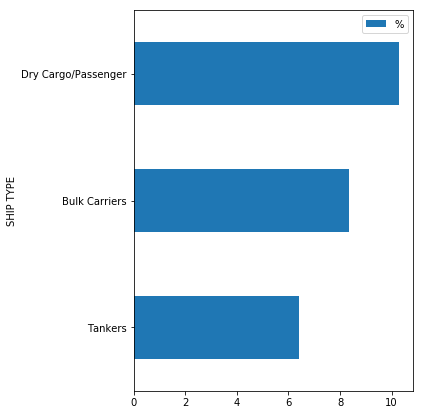

In [44]:
# Relative frequency of accidents by Ship Type
dep_cat_binary_target_freq(ship_data, "SHIP TYPE", "accident").plot.barh(figsize=(5, 7))

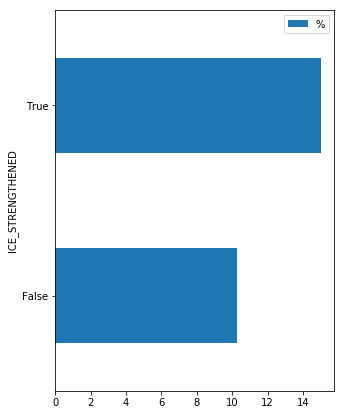

In [46]:
# Relative frequency of accidents by Ice Strengthened
dep_cat_binary_target_freq(ship_data, "ICE_STRENGTHENED", "accident").plot.barh(figsize=(5, 7))

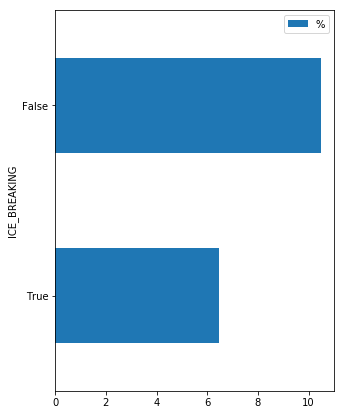

In [47]:
# Relative frequency of accidents by Ice Breaking
dep_cat_binary_target_freq(ship_data, "ICE_BREAKING", "accident").plot.barh(figsize=(5, 7))

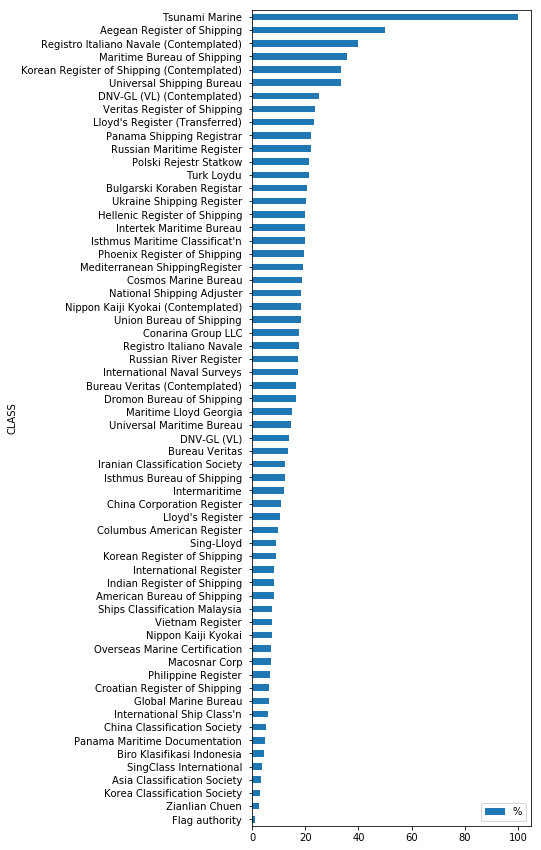

In [48]:
# Relative frequency of accidents by Class
dep_cat_binary_target_freq(ship_data, "CLASS", "accident").plot.barh(figsize=(5, 15))

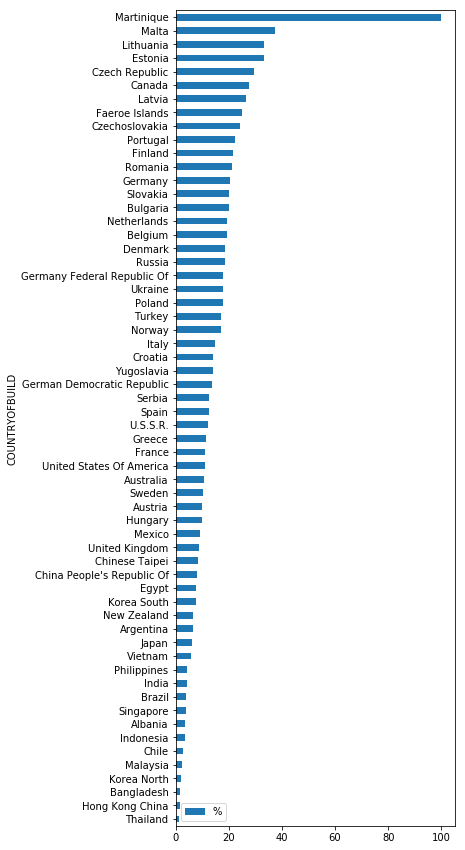

In [49]:
# Relative frequency of accidents by Country of Build
dep_cat_binary_target_freq(ship_data, "COUNTRYOFBUILD", "accident").plot.barh(figsize=(5, 15)) # Tells you something about manufacturer

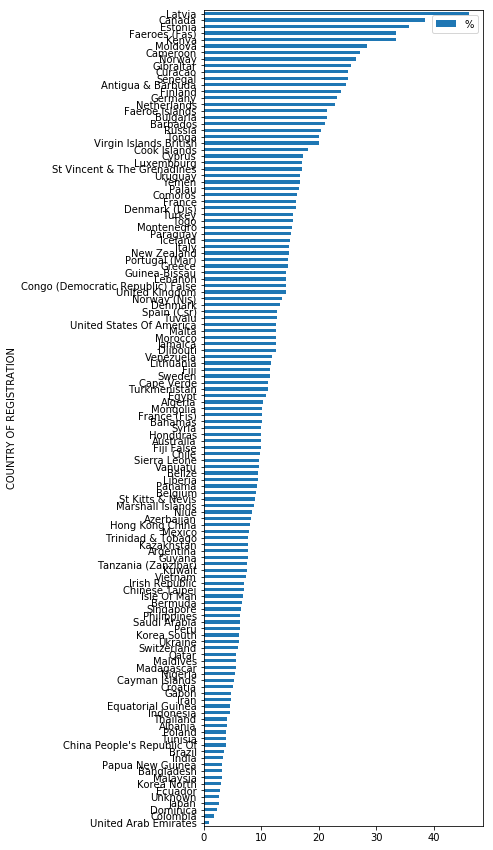

In [50]:
# Relative frequency of accidents by Country of Registration
dep_cat_binary_target_freq(ship_data, "COUNTRY OF REGISTRATION", "accident").plot.barh(figsize=(5, 15)) # Tells you something about use of ships?

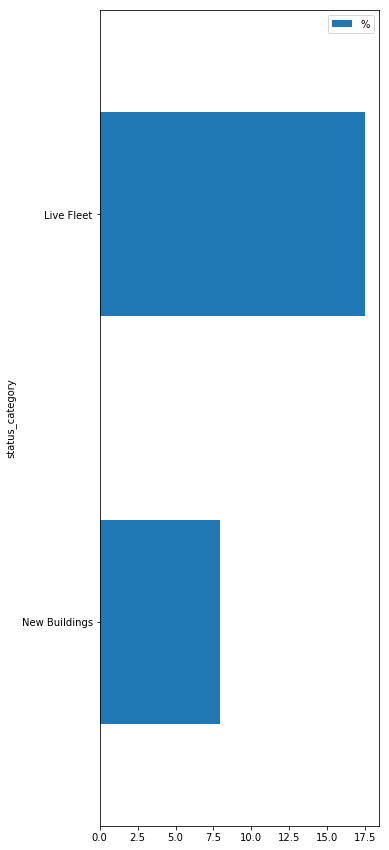

In [51]:
# Relative frequency of accidents by status category
dep_cat_binary_target_freq(ship_and_status_data, "status_category", "accident").plot.barh(figsize=(5, 15))

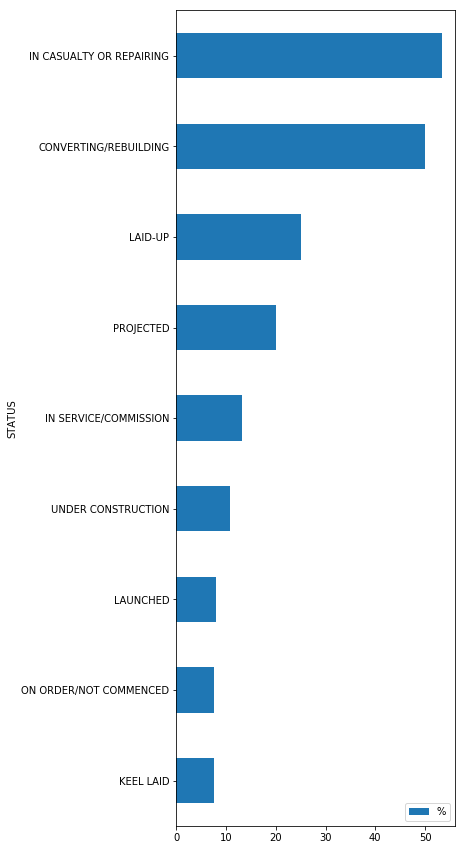

In [52]:
# Relative frequency of accidents by status
dep_cat_binary_target_freq(ship_and_status_data, "STATUS", "accident").plot.barh(figsize=(5, 15))

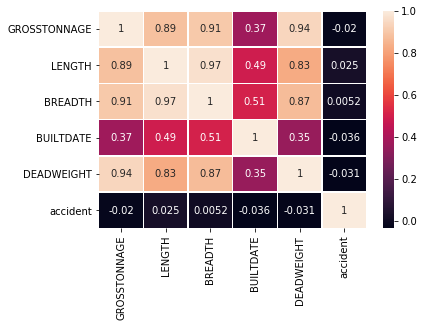

In [53]:
# Correlation matrix of numerical variables
sns.heatmap(ship_data.corr(), annot=True, linewidths =.5); ## heatmap for numerical vars

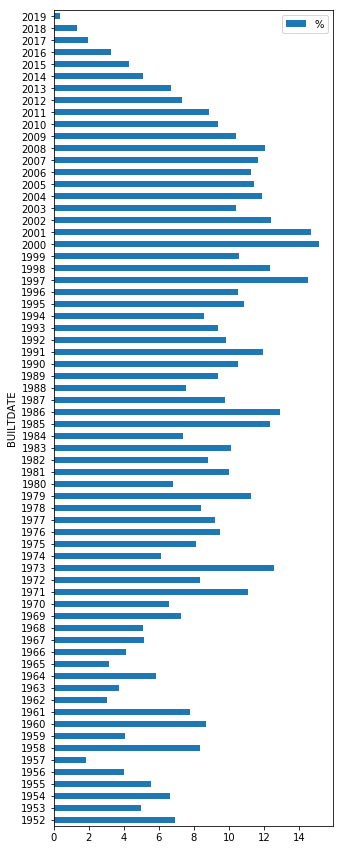

In [55]:
## Assessing accidents by built date
dep_cat_binary_target_freq(ship_data, "BUILTDATE", "accident", sort = "cat").plot.barh(figsize=(5, 15)) # Tells you something about use of ships?

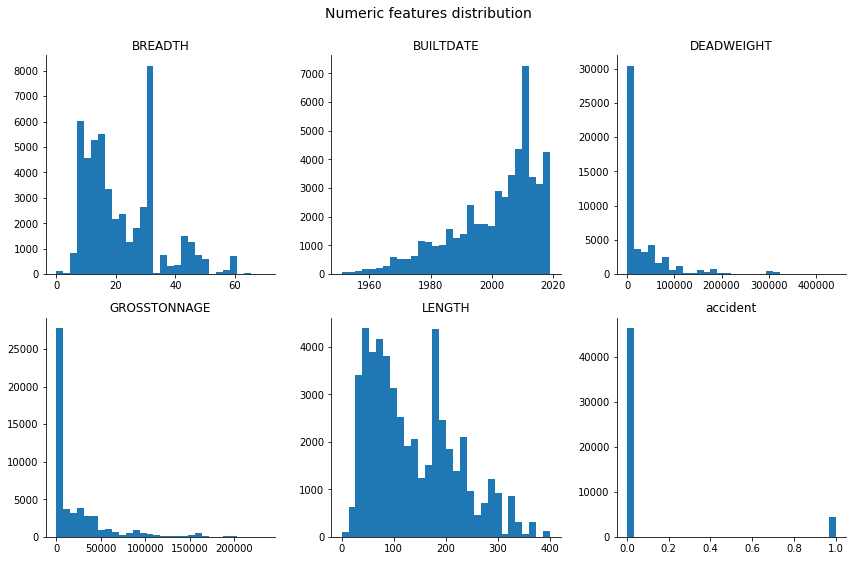

In [57]:
# Distributions of numeric variables
ship_data.hist(figsize=(12, 30), bins=30, grid=False, layout=(8, 3))
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])

## Data preparation for modelling

In [63]:
# Feature transformation for modelling
ship_data_transformed = ship_data.drop(['ACCIDENT DATE', 'Unique Identifier'], axis = 1)

## One-hot encoding categorical features
categories = ['SHIP TYPE', 'ICE_STRENGTHENED',
              'ICE_BREAKING', 'CLASS', 'COUNTRYOFBUILD',
              'COUNTRY OF REGISTRATION', 'BUILTDATE']
ship_data_transformed = pd.get_dummies(ship_data_transformed, columns = categories).dropna()

## log-transformations of skewed numerical features
skewed = ['BREADTH', 'DEADWEIGHT', 'LENGTH', 
          'GROSSTONNAGE', 'LENGTH']
ship_data_transformed[skewed] = ship_data_transformed[skewed].apply(lambda x: np.log(x + 1))

## normalisations to keep numerical features the same scale
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['BREADTH', 'DEADWEIGHT', 'LENGTH', 
          'GROSSTONNAGE', 'LENGTH']

ship_data_transformed[numerical] = scaler.fit_transform(ship_data_transformed[numerical])

## Target variable
target = ship_data_transformed['accident']
ship_data_transformed = ship_data_transformed.drop(['accident'], axis = 1)

## Shuffle and split data
X_train, X_test, y_train, y_test = train_test_split(ship_data_transformed, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("Training set has {} features.".format(X_train.shape[1]))

Training set has 40689 samples.
Testing set has 10173 samples.
Training set has 484 features.


## Modelling

In [65]:
# Function for modelling
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on training sample
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute accuracy on training sample
    results['prec_train'] = precision_score(y_train, predictions_train)
        
    # Compute accuracy on test set
    results['prec_test'] = precision_score(y_test, predictions_test)
    
    # Compute accuracy on training sample
    results['rec_train'] = recall_score(y_train, predictions_train)
        
    # Compute accuracy on test set
    results['rec_test'] = recall_score(y_test, predictions_test)
    
    # Compute F-score on training samples
    results['f_train'] = fbeta_score(y_train, predictions_train, 0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [66]:
# Importing modelling libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression, RidgeCV, LassoCV, SGDClassifier

In [67]:
# Initialize the models
clf_A = DecisionTreeClassifier(random_state = 42)
clf_B = AdaBoostClassifier(random_state = 42)
clf_C = RidgeClassifier(random_state = 42)
clf_D = LogisticRegression(random_state = 42)

In [69]:
# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(X_train)
samples_10 = int(len(X_train)/10)
samples_1 = int(len(X_train)/100)

In [70]:
# Collect results on the learners
results = ['train_time', 'pred_time', 'acc_train', 'acc_test', 'prec_train', 'prec_test','rec_train','rec_test','f_train','f_test']
results = pd.DataFrame(pd.Series(results, name='Metrics')).set_index('Metrics')
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        s = pd.Series(train_predict(clf, samples, X_train, y_train, X_test, y_test), name = (clf_name+str(i))).reset_index()
        s = s.rename({'index':'Metrics'}, axis='columns')
        results = pd.merge(results, s, how='left', on = ['Metrics'])

display(results)

DecisionTreeClassifier trained on 406 samples.
DecisionTreeClassifier trained on 4068 samples.
DecisionTreeClassifier trained on 40689 samples.
AdaBoostClassifier trained on 406 samples.
AdaBoostClassifier trained on 4068 samples.
AdaBoostClassifier trained on 40689 samples.
RidgeClassifier trained on 406 samples.
RidgeClassifier trained on 4068 samples.
RidgeClassifier trained on 40689 samples.
LogisticRegression trained on 406 samples.
LogisticRegression trained on 4068 samples.
LogisticRegression trained on 40689 samples.


,Metrics,DecisionTreeClassifier0,DecisionTreeClassifier1,DecisionTreeClassifier2,AdaBoostClassifier0,AdaBoostClassifier1,AdaBoostClassifier2,RidgeClassifier0,RidgeClassifier1,RidgeClassifier2,LogisticRegression0,LogisticRegression1,LogisticRegression2
0,train_time,0.029059,0.126880,3.160436,0.086296,0.564046,6.181275,0.011029,0.046160,0.429788,0.003008,0.034627,0.615368
1,pred_time,0.138964,0.126405,0.137336,0.940703,0.972654,0.956355,0.107290,0.107325,0.106315,0.098334,0.113307,0.111298
2,acc_train,0.876478,0.866180,0.995601,0.886112,0.908034,0.911991,0.899383,0.910590,0.911868,0.908845,0.909410,0.911942
3,acc_test,0.879583,0.850290,0.855598,0.885186,0.908778,0.912415,0.900718,0.909368,0.911629,0.908090,0.909958,0.912022
4,prec_train,0.156741,0.244365,0.998828,0.184226,0.332623,0.520408,0.211778,0.317241,0.476190,0.245902,0.301961,0.513158
5,prec_test,0.157025,0.148438,0.168966,0.168675,0.330097,0.535714,0.193717,0.177778,0.250000,0.171875,0.290909,0.444444
6,rec_train,0.091771,0.247978,0.951185,0.085356,0.043515,0.014226,0.052162,0.012831,0.002789,0.016736,0.021478,0.010879
7,rec_test,0.085106,0.148936,0.164614,0.078387,0.038074,0.016797,0.041433,0.008959,0.003359,0.012318,0.017917,0.008959
8,f_train,0.137301,0.245079,0.988922,0.149575,0.142831,0.064119,0.131376,0.055222,0.013628,0.065775,0.083605,0.050141
9,f_test,0.134323,0.148537,0.168077,0.137094,0.130268,0.074627,0.111648,0.037279,0.015940,0.047868,0.071878,0.041451


In [71]:
# Extract feature importance from best model
model = clf_B.fit(X_train, y_train)

## Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

table_importances=pd.DataFrame({"Name":X_train.columns,
                 "Feature Importance":importances})
    
table_importances = table_importances.nlargest(10, 'Feature Importance')

display(table_importances)

,Name,Feature Importance
0,GROSSTONNAGE,0.12
3,DEADWEIGHT,0.06
1,LENGTH,0.04
5,SHIP TYPE_Dry Cargo/Passenger,0.04
2,BREADTH,0.02
4,SHIP TYPE_Bulk Carriers,0.02
7,ICE_STRENGTHENED_False,0.02
9,ICE_BREAKING_False,0.02
83,CLASS_Nippon Kaiji Kyokai,0.02
101,CLASS_Registro Italiano Navale,0.02


In [73]:
# Extract coefficients from linear model
model_for_inference = clf_C.fit(X_train, y_train)

## Extract the feature importances using .feature_importances_ 
inference_coef = pd.DataFrame(
        {"Name" : X_train.columns, 
         "Coefficient" : model_for_inference.coef_.T[:, 0]}
        ) ## recall is quite weak. But precision is good.

display(inference_coef)

,Name,Coefficient
0,GROSSTONNAGE,0.297616
1,LENGTH,0.719284
2,BREADTH,-0.765100
3,DEADWEIGHT,0.020419
4,SHIP TYPE_Bulk Carriers,0.001532
5,SHIP TYPE_Dry Cargo/Passenger,0.028341
6,SHIP TYPE_Tankers,-0.029872
7,ICE_STRENGTHENED_False,0.001146
8,ICE_STRENGTHENED_True,0.014725
9,ICE_BREAKING_False,0.035979


### Further work

- The final model is fairly weak.
- Need to understand where the noise is coming from in the model. This could be done by going through coefficients and removing features which have weak and statistically insignificant predictive power.
- Gathering better matching data on status could help us understand how the timing of status affects the probability of an accident. It may also help us refine the sample for the current model.
